In [1]:
#패키지 설정                               
from sklearn.preprocessing import StandardScaler         #정규화 모듈 설정
from sklearn.model_selection import train_test_split       #학습용과 테스트용 분리
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential        #딥러닝 모형화
from keras.layers import Dense           #층간 노드 모두 연결
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_excel('/content/drive/MyDrive/대학원/1학기/1. 고급통계분석(김영순)/z. 기말고사 과제/파이썬 분석(최종)/현대차/현대차 주가 관련 자료(엑셀)-1.xlsx')

print(df.head(3))

          일자      시가      고가      저가      종가  전일비  7 거래일 이후 최고 상승률    등락  \
0 2022-12-05  169500  170000  164500  165500    0                0 -3500   
1 2022-12-02  172000  172500  168500  169000    0                0 -2500   
2 2022-12-01  172000  173000  170500  171500    1                0  2500   

   주가등락률     거래량  ...  사모펀드(KOSPI)  기타법인(KOSPI)    기준환율  환율 증감  Open(NASDAQ)  \
0  -2.07  788455  ...         -913           59  1292.6   -7.3   11380.99023   
1  -1.46  453689  ...         -776           31  1299.9    0.2   11308.37988   
2   1.48  499538  ...          -37          191  1299.7  -19.1   11475.16992   

   High(NASDAQ)  Low(NASDAQ)  Close(NASDAQ)  Volume(NASDAQ)  나스닥 등락율  
0   11425.50977  11193.01953    11239.94043      4510030000    -0.02  
1   11492.32031  11296.71973    11461.50000      4523010000     0.00  
2   11546.76953  11378.75000    11482.45020      5158120000     0.00  

[3 rows x 45 columns]


In [5]:
df['7 거래일 이후 최고 상승률'].value_counts()

1    834
2    107
4     14
0      7
3      7
Name: 7 거래일 이후 최고 상승률, dtype: int64

In [6]:
df.set_index('일자',inplace=True)
df = df.astype('float')   #inplace 가 없음

In [7]:
X = df.drop('7 거래일 이후 최고 상승률', axis=1)
y=df[['7 거래일 이후 최고 상승률']]   #목표변수의 데이터 프레임
y = y.astype(int)
print(y)

            7 거래일 이후 최고 상승률
일자                         
2022-12-05                0
2022-12-02                0
2022-12-01                0
2022-11-30                0
2022-11-29                0
...                     ...
2019-01-09                1
2019-01-08                1
2019-01-07                1
2019-01-04                1
2019-01-03                1

[969 rows x 1 columns]


In [8]:
X.columns

Index(['시가', '고가', '저가', '종가', '전일비', '등락', '주가등락률', '거래량', '장전거래', '장중거래',
       '장후거래', '금액(백만)', '신용비', '개인', '기관', '외인(수량)', '외국계', '프로그램', '외인비',
       'KOSPI', '전일비(KOSPI)', '등락(KOSPI)', '등락률(KOSPI)', '거래대금(KOSPI)',
       '개인(KOSPI)', '외국인(KOSPI)', '기관계(KOSPI)', '금융투자(KOSPI)', '보험(KOSPI)',
       '투신(KOSPI)', '기타금융(KOSPI)', '은행(KOSPI)', '연기금등(KOSPI)', '사모펀드(KOSPI)',
       '기타법인(KOSPI)', '기준환율', '환율 증감', 'Open(NASDAQ)', 'High(NASDAQ)',
       'Low(NASDAQ)', 'Close(NASDAQ)', 'Volume(NASDAQ)', '나스닥 등락율'],
      dtype='object')

### PCA 적용

In [9]:
#데이터 표준화
scalerX = StandardScaler()
scalerX.fit(X)
X_std = scalerX.transform(X)
X_std

array([[ 0.05554369,  0.01670606, -0.00498523, ...,  0.01560147,
         0.29854255, -1.21238983],
       [ 0.11148224,  0.072054  ,  0.08577452, ...,  0.09919242,
         0.30709062, -0.04109796],
       [ 0.11148224,  0.08312359,  0.13115439, ...,  0.1070966 ,
         0.72534706, -0.04109796],
       ...,
       [-1.02966416, -1.05704413, -1.0260324 , ..., -1.65066357,
        -1.00973456,  0.54454797],
       [-1.14154126, -1.02383537, -1.10544718, ..., -1.68258573,
        -0.96185743,  2.30148577],
       [-1.20866752, -1.12346167, -1.17351699, ..., -1.78647469,
        -0.9385445 , -1.79803576]])

In [10]:
from sklearn.decomposition import PCA
#주성분분석 객체 생성
pca = PCA()

#주성분분석
pca.fit(X_std)

PCA()

Text(0, 0.5, 'Variance Ratio')

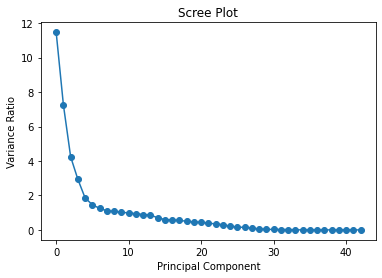

In [11]:
#주성분 분산
plt.plot(pca.explained_variance_, 'o-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')

# 4

In [12]:
import numpy as np
result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in range(X.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,1.147075e+01,2.664864e-01,0.266486
pca2,7.249926e+00,1.684289e-01,0.434915
pca3,4.239699e+00,9.849589e-02,0.533411
pca4,2.928815e+00,6.804169e-02,0.601453
pca5,1.850170e+00,4.298281e-02,0.644436
pca6,1.460579e+00,3.393189e-02,0.678368
pca7,1.248915e+00,2.901455e-02,0.707382
pca8,1.115288e+00,2.591017e-02,0.733292
pca9,1.068871e+00,2.483182e-02,0.758124
pca10,1.035345e+00,2.405293e-02,0.782177


In [13]:
X_std_pca = pca.fit_transform(X_std)[:,:23]

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X_std_pca,y,test_size=0.3, random_state=1)    #학습용과 데이터 분리(7:3)

In [15]:
X_train.shape

(678, 23)

In [16]:
y_train.reset_index(inplace=True)
y_train2 = np.array(y_train['7 거래일 이후 최고 상승률'])
y_test.reset_index(inplace=True)
y_test2 = np.array(y_test['7 거래일 이후 최고 상승률'])

In [17]:
y_train['7 거래일 이후 최고 상승률'].value_counts()

1    586
2     76
4      8
0      4
3      4
Name: 7 거래일 이후 최고 상승률, dtype: int64

In [18]:
y_test['7 거래일 이후 최고 상승률'].value_counts()

1    248
2     31
4      6
3      3
0      3
Name: 7 거래일 이후 최고 상승률, dtype: int64

In [19]:
import numpy as np
y_train2 = pd.get_dummies(y_train2)
y_test2 = pd.get_dummies(y_test2)

In [23]:
#모형 구조
model=Sequential()       #순차모형
model.add(Dense(20,activation='relu', input_shape=(23,)))      #제1은닉층과 입력층
#model.add(Dense(15,activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 20)                480       
                                                                 
 dense_3 (Dense)             (None, 5)                 105       
                                                                 
Total params: 585
Trainable params: 585
Non-trainable params: 0
_________________________________________________________________


In [24]:
#모형구성
import tensorflow as tf
model.compile(optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy',tf.keras.metrics.Precision(name='precision')])

In [25]:
#학습
results=model.fit(X_train, y_train2,                 #학습데이터
	        validation_data=(X_test, y_test2),	   #테스트데이터	
	        epochs=100,batch_size=32)

Epoch 1/100
22/22 [==============================] - 1s 17ms/step - loss: 1.9774 - accuracy: 0.2065 - precision: 0.1647 - val_loss: 1.7018 - val_accuracy: 0.3368 - val_precision: 0.3158
Epoch 2/100
22/22 [==============================] - 0s 4ms/step - loss: 1.5380 - accuracy: 0.3864 - precision: 0.3945 - val_loss: 1.3463 - val_accuracy: 0.4433 - val_precision: 0.5887
Epoch 3/100
22/22 [==============================] - 0s 4ms/step - loss: 1.2070 - accuracy: 0.5339 - precision: 0.6354 - val_loss: 1.0963 - val_accuracy: 0.5773 - val_precision: 0.7266
Epoch 4/100
22/22 [==============================] - 0s 4ms/step - loss: 0.9787 - accuracy: 0.6696 - precision: 0.7627 - val_loss: 0.9267 - val_accuracy: 0.7285 - val_precision: 0.8034
Epoch 5/100
22/22 [==============================] - 0s 4ms/step - loss: 0.8208 - accuracy: 0.7611 - precision: 0.8301 - val_loss: 0.8115 - val_accuracy: 0.8041 - val_precision: 0.8465
Epoch 6/100
22/22 [==============================] - 0s 4ms/step - loss: 0

In [26]:
#학습모형에 저장된 키(변수)
print(results.history.keys())

dict_keys(['loss', 'accuracy', 'precision', 'val_loss', 'val_accuracy', 'val_precision'])


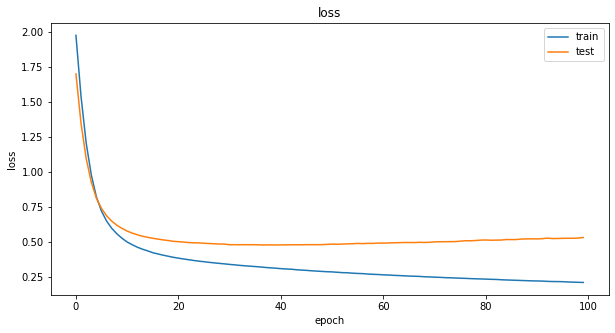

In [27]:
#학습 수에 따른 loss변화
plt.figure(figsize=(10,5))
plt.plot(results.history['loss'])    #학습데이터의 손실
plt.plot(results.history['val_loss'])     #테스트데이터의 손실
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'], loc='upper right')
plt.show()

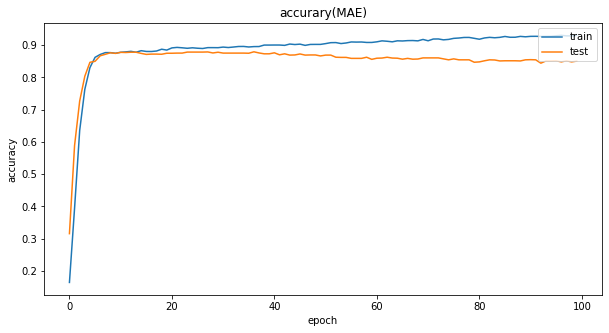

In [28]:
#학습 수에 따른 정확도(mae)변화
plt.figure(figsize=(10,5))
plt.plot(results.history['precision'])      #학습데이터의 오차
plt.plot(results.history['val_precision'])   #테스트 데이터의 오차
plt.title('accurary(MAE)')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'], loc='upper right')
plt.show()

In [29]:
y_pred=np.argmax(model.predict(X_test), axis=1)
y_test = y_test['7 거래일 이후 최고 상승률']
import sklearn
sklearn.metrics.confusion_matrix(y_test, y_pred)

10/10 [==============================] - 0s 2ms/step


array([[  0,   3,   0,   0,   0],
       [  0, 241,   7,   0,   0],
       [  0,  26,   5,   0,   0],
       [  0,   2,   1,   0,   0],
       [  0,   1,   4,   0,   1]])

In [30]:
from sklearn.metrics import *
acc = accuracy_score(y_test, y_pred)
print('accuracy_score : ',acc)

pre = precision_score(y_test, y_pred, average='weighted')
print('precision_score : ', pre)

recall = recall_score(y_test, y_pred, average='weighted')
print('recall_score: ', recall)

accuracy_score :  0.8487972508591065
precision_score :  0.8042888315780978
recall_score:  0.8487972508591065


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
